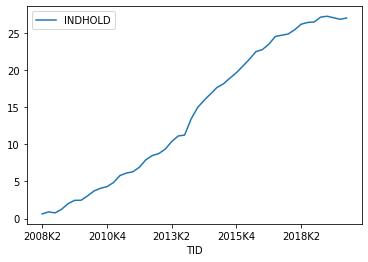

In [8]:
#5 With data aggregation and data visualization answer the following questions:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
#A
file = glob('FOLK1A-3.csv')
ecsv = file[0]
e = pd.read_csv(ecsv, sep = ';')
e

for element in range(1,len(e['INDHOLD'])):
    e.loc[element,'INDHOLD'] = ((float(e['INDHOLD'][element]) / float(e['INDHOLD'][0])-1)*100)
    
e = e[:][1:]
e
e.plot(x="TID", y="INDHOLD")



/home/zzar/.local/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CIVILSTAND,OMRÅDE,TID,INDHOLD
104,I alt,Aalborg,2020K1,54.448463
58,I alt,Odense,2020K1,54.901291
3,I alt,Frederiksberg,2020K1,58.272374
84,I alt,Aarhus,2020K1,59.576894
2,I alt,København,2020K1,65.235791


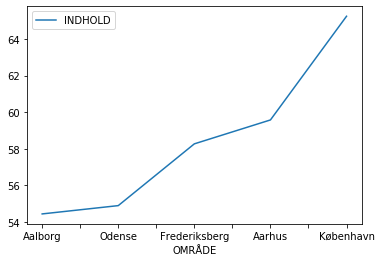

In [6]:
#B Which of the 5 biggest cities has the highest percentage of 'Never Married'?

files = glob('FOLK1A-4.csv')
ccsv = files[0]
civil = pd.read_csv(ccsv, sep = ';')
civil

alle_civil = civil[civil['CIVILSTAND'] == 'I alt']
alle_civil

ugift_civil = civil[civil['CIVILSTAND'] == 'Ugift']
ugift_civil

civil_list = alle_civil

for element in range(len(civil_list['INDHOLD'])):
    civil_list.loc[element,'INDHOLD'] = (float(ugift_civil['INDHOLD'][element+len(alle_civil)]) / (float(alle_civil['INDHOLD'][element]))*100)
    
civil_list = civil_list[-civil_list['OMRÅDE'].apply(lambda x: (x == 'Hele landet'))]
civil_list = civil_list[-civil_list['OMRÅDE'].apply(lambda x: (x[0:6] == 'Region'))]
civil_list = civil_list.sort_values(by='INDHOLD')   
civil_list = civil_list[-6:][1:]
civil_list
civil_list.plot(x="OMRÅDE", y="INDHOLD")

civil_list

,OMRÅDE,TID,CIVILSTAND,INDHOLD
0,København,2008K1,I alt,509861
1,København,2008K1,Ugift,309661
2,København,2008K1,Gift/separeret,128556
3,København,2008K1,Enke/enkemand,21555
4,København,2008K1,Fraskilt,50089
...,...,...,...,...
240,København,2020K1,I alt,632340
241,København,2020K1,Ugift,412512
242,København,2020K1,Gift/separeret,150458
243,København,2020K1,Enke/enkemand,14630


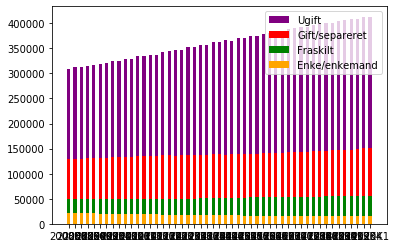

In [12]:
#C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

files = glob('FOLK1A-5.csv')
civil_csv = files[0]
civils = pd.read_csv(civil_csv, sep = ';')
civils

gift_civil = civils[civils['CIVILSTAND'] == 'Gift/separeret']
ugift_civil = civils[civils['CIVILSTAND'] == 'Ugift']
enke_civil = civils[civils['CIVILSTAND'] == 'Enke/enkemand']
fraskilt_civil = civils[civils['CIVILSTAND'] == 'Fraskilt']

p1 = plt.bar(ugift_civil['TID'], ugift_civil['INDHOLD'], width=0.5, align='center' , color='purple')
p2 = plt.bar(gift_civil['TID'], gift_civil['INDHOLD'], width=0.5, align='center' , color='red')
p3 = plt.bar(fraskilt_civil['TID'], fraskilt_civil['INDHOLD'], width=0.5, align='center' , color='green')
p4 = plt.bar(enke_civil['TID'], enke_civil['INDHOLD'], width=0.5, align='center' , color='orange')
plt.legend([p1,p2,p3,p4],['Ugift','Gift/separeret','Fraskilt','Enke/enkemand'],loc=1)

civilstand